In [ ]:
import torch
import torchvision
import numpy as np
from google.colab import drive

In [ ]:
batch_size = 1000

In [ ]:
test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size, shuffle=True)

In [ ]:
batch = enumerate(test_loader)
target_indices = np.zeros((1, 10))
target_images = np.zeros((10, 28, 28))
target_completed = 0
batch_idx, (sample_data, sample_targets) = next(batch)
for i in range(batch_size):
    if target_indices[0, sample_targets[i]] == 0:
        target_images[sample_targets[i], :, :] = sample_data[i, 0, :, :]
        target_indices[0, sample_targets[i]] = 1

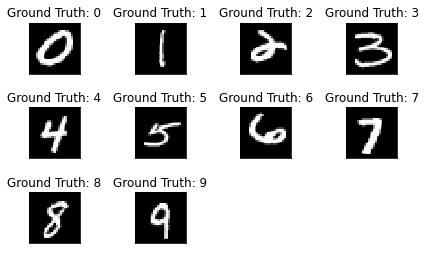

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(10):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(target_images[i, :, :], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(i))
  plt.xticks([])
  plt.yticks([])
# fig

In [ ]:
target_images.shape

(10, 28, 28)

In [ ]:
drive.mount('/drive')
torch.save(torch.from_numpy(target_images), '/drive/My Drive/BIA_MnistTrained/sample_images.pth')

Mounted at /drive
